# Medium Article - CNNs for Computer Vision

https://medium.com/intuitive-deep-learning/intuitive-deep-learning-part-2-cnns-for-computer-vision-24992d050a27

In [0]:
import pandas as pd
import tensorflow as tf
import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
import matplotlib.pyplot as plt

Add seeding to models to generate reproducable training result.

In [0]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

# Step 1 - Loading and Cleaning Image Data

Images will be 32 x 32 pixels in size, with 10 possible labels and the dataset size will be 6000 (5000 for training and 1000 for testing)

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


Printing out dataset dimensions

In [0]:
print('x_train_shape', x_train.shape)

x_train_shape (50000, 32, 32, 3)


In [0]:
print('x_test_shape', y_train.shape)

x_test_shape (50000, 1)


Printing out individual image dataset.

In [0]:
print('Image 1 Data', x_train[0])

Image 1 Data [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Showing the actual image.

Image 1 Pic AxesImage(54,36;334.8x217.44)


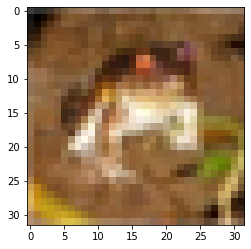

In [0]:
print('Image 1 Pic', plt.imshow(x_train[0]))

We need set up the model to it predicts the probability of each image being one of the ten classes. To do so, there need to be 10 Output Neurons in the network, and the label needs to be converted into a set of 10 numbers representing if the image belongs to that class (if the image belongs to the first class is will be set to 1 and the rest will be zero).

![alt text](https://miro.medium.com/max/1130/1*t-ttNgcua-JtTlLjdRScww.png)


In [0]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
print('y_train_one_hot', y_train_one_hot[1])

y_train_one_hot [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


The image data is represented as a number between 1 and 255, so this will need to be normalised in order to improve the training of the model.

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#print the newly normalized data
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

# Step 3 - Building and Training the Neural Net

- Conv Layer (Filter size 3x3, Depth 32)
- Conv Layer (Filter size 3x3, Depth 32)
- Max Pool Layer (Filter size 2x2)
- Dropout Layer (Prob of dropout 0.25)
- Conv Layer (Filter size 3x3, Depth 64)
- Conv Layer (Filter size 3x3, Depth 64)
- Max Pool Layer (Filter size 2x2)
- Dropout Layer (Prob of dropout 0.25)
- FC Layer (512 neurons)
- Dropout Layer (Prob of dropout 0.5)
- FC Layer, Softmax (10 neurons)

![alt text](https://miro.medium.com/max/2000/1*b4neYlVytzv5lfGmHAcqTQ.png)

In [0]:
# Specifying the first layers
model = tf.keras.Sequential();

# Creates a Convolution layer with 32 depth, and (3, 3) filter width and size.
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
# A duplicated of the above layer, except the input shape doesn't need to be defined again.
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
# Pooling layer used to amalgamate the results from filtered output
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
# Finally add a dropout layer to help prevent Overfitting
model.add(tf.keras.layers.Dropout(0.25))


The next four layers are pretty much the same, except the depth of the convolution layer is 64 rather than 32.

In [0]:
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

Need to flatten the model to bring Neurons from cube like shape to a single row.

In [0]:
model.add(tf.keras.layers.Flatten())

Finally adding the final four layers

In [0]:

model.add(tf.keras.layers.Dense(512, activation = 'relu'))
# high probability droput layer
model.add(tf.keras.layers.Dropout(0.5))
# output layer
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

# Step 4 - Compiling and Training The Model

Going to use a loss function called "Categorical Cross Entropy", which is suitable for dealing with classification of many classes. Also using the Adam optimizer for Gradient Descent.

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist = model.fit(x_train, y_train_one_hot, batch_size = 32, epochs= 20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 133s 106ms/step - loss: 1.5999 - accuracy: 0.4171 - val_loss: 1.2306 - val_accuracy: 0.5605
Epoch 2/20
1250/1250 [==============================] - 137s 109ms/step - loss: 1.1873 - accuracy: 0.5757 - val_loss: 1.0899 - val_accuracy: 0.6163
Epoch 3/20
1250/1250 [==============================] - 133s 106ms/step - loss: 1.0253 - accuracy: 0.6385 - val_loss: 0.9003 - val_accuracy: 0.6816
Epoch 4/20
1250/1250 [==============================] - 133s 106ms/step - loss: 0.9214 - accuracy: 0.6759 - val_loss: 0.8552 - val_accuracy: 0.7012
Epoch 5/20
1250/1250 [==============================] - 132s 106ms/step - loss: 0.8470 - accuracy: 0.7027 - val_loss: 0.7944 - val_accuracy: 0.7247
Epoch 6/20
1250/1250 [==============================] - 133s 106ms/step - loss: 0.7815 - accuracy: 0.7244 - val_loss: 0.7428 - val_accuracy: 0.7440
Epoch 7/20
1250/1250 [==============================] - 136s 109ms/step - loss: 0.7314 - accuracy: 0.7411 - val_

Model accuracy/loss validation

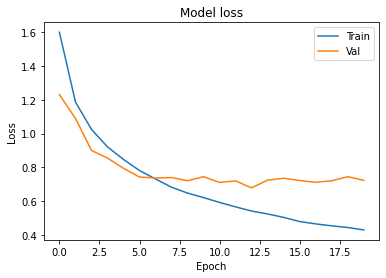

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

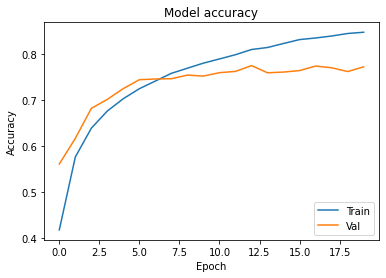

In [0]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 8s 27ms/step - loss: 0.7651 - accuracy: 0.7638


0.7638000249862671

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
model.save('/content/gdrive/My Drive/Neural Networks/Models/my_cifar10_model1.h5')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Testing With Custom Image

Now I'm going to load my own image to test the models accuracy.

In [0]:
from google.colab import files
#uploaded = files.upload();